# PAUTA
##### Cuaderno práctico 25/06/2022: Estadística para Data Science



Se puede trabajar de manera individual o en grupos de máximo 4 personas. Si trabajas en grupo, igualmente debes entregar en el buzón (o al correo v.landaeta@udd.cl si no tienes canvas) de manera individual con tu nombre y los nombres de los otros integrantes del grupo.




# 0. Cargando librerías


In [1]:
# código para 0
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 



## 1. Dataset: Real estate en Ames, Iowa

Vamos a cargar nuestro primer dataset, el detalle de cada transacción de venta de propiedades residenciales en la ciudad de Ames, que fueron registradas entre el 2006 y el 2010. Este set de datos censal va a representar nuestra población de interés. 

In [2]:
df_url = 'https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase4/ames.csv'

ames = pd.read_csv(df_url)

Veamos las primeras filas de este dataset

In [3]:
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Vemos que este dataset tiene muchas variables, con los cuales se podrían hacer análisis muy detallados. Para esta tarea, vamos a tomar en cuenta solo algunas variables: El área habitable construida de la casa sobre el suelo en pies cuadrados (`Gr.Liv.Area`), el precio de venta (`SalePrice`), el area del terreno (`Lot.Area`) y la calidad y condición del sistema de calefacción (`Heating.QC`). Creamos un dataframe con estas columnas:

In [4]:
df = ames[['Gr.Liv.Area','SalePrice','Lot.Area','Heating.QC']]

Y vemos algunas estadísticas descriptivas para cada variable ocupando el método `describe()` y el método `value_counts()`.

In [5]:
df.describe()

,Gr.Liv.Area,SalePrice,Lot.Area
count,2930.000000,2930.000000,2930.000000
mean,1499.690444,180796.060068,10147.921843
std,505.508887,79886.692357,7880.017759
min,334.000000,12789.000000,1300.000000
25%,1126.000000,129500.000000,7440.250000
50%,1442.000000,160000.000000,9436.500000
75%,1742.750000,213500.000000,11555.250000
max,5642.000000,755000.000000,215245.000000


In [6]:
df['Heating.QC'].value_counts()

Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: Heating.QC, dtype: int64

En la variable `Heating.QC`, cada categoría corresponde a lo siguiente:

Ex: Excellent

Gd: Good

TA: Average/Typical

Fa: Fair

Po: Poor

## Pregunta:

a) Construye tres scatterplot entre las tres variables numéricas de `df` y una matriz de correlación entre estas variables.



## Respuesta

### a)

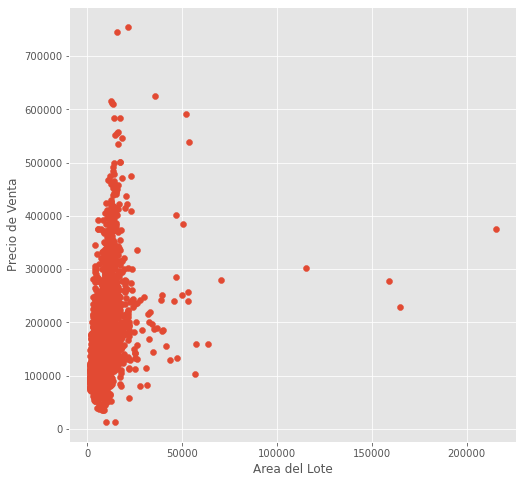

In [7]:
# GRAFICO 1: PRECIO VS AREA DEL LOTE

plt.style.use('ggplot') # ggplot es un paquete de gráficos muy popular en R.

# acá podemos variar el tamaño de la figura: (ancho,alto) 
plt.rcParams['figure.figsize'] = (8,8)

# Crear scatterplot
fig = plt.scatter( df['Lot.Area'], df['SalePrice'])

# Añadir labels
plt.ylabel('Precio de Venta')
plt.xlabel('Area del Lote')
plt.show()


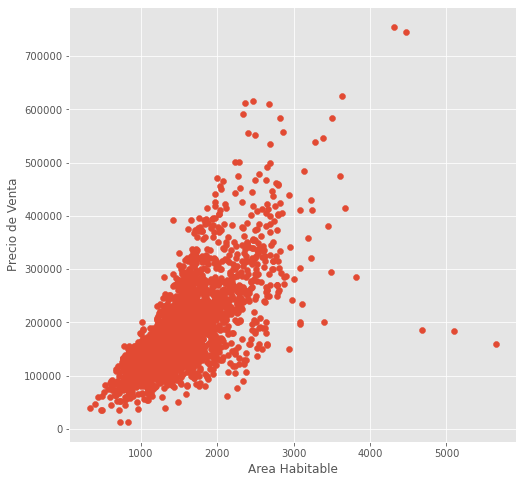

In [8]:
# GRAFICO 2: PRECIO VS AREA HABITABLE

plt.style.use('ggplot') # ggplot es un paquete de gráficos muy popular en R.

# acá podemos variar el tamaño de la figura: (ancho,alto) 
plt.rcParams['figure.figsize'] = (8,8)

# Crear scatterplot
fig = plt.scatter( df['Gr.Liv.Area'], df['SalePrice'])

# Añadir labels
plt.ylabel('Precio de Venta')
plt.xlabel('Area Habitable')
plt.show()

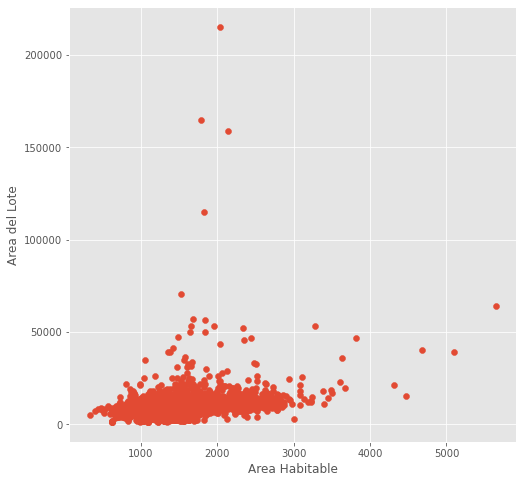

In [9]:
# GRAFICO 3: AREA DEL LOTE VS AREA HABITABLE

plt.style.use('ggplot') # ggplot es un paquete de gráficos muy popular en R.

# acá podemos variar el tamaño de la figura: (ancho,alto) 
plt.rcParams['figure.figsize'] = (8,8)

# Crear scatterplot
fig = plt.scatter( df['Gr.Liv.Area'], df['Lot.Area'])

# Añadir labels
plt.ylabel('Area del Lote')
plt.xlabel('Area Habitable')
plt.show()

In [10]:
# Matriz de Correlaciones 
df.corr()

,Gr.Liv.Area,SalePrice,Lot.Area
Gr.Liv.Area,1.000000,0.706780,0.285599
SalePrice,0.706780,1.000000,0.266549
Lot.Area,0.285599,0.266549,1.000000


## Pregunta 
b) Crea una nueva variable en el dataframe `df` llamada `ex_heat` que sea 1 cuando `Heating.QC` sea Excellent y 0 si es cualquier otra categoría. Calcula el promedio de `ex_heat` para la muestra completa



 

## Respuesta

### b)

In [11]:
# se puede hacer de varias formas, por ejemplo con numpy.where
import numpy as np

df['ex_heat'] = np.where(df['Heating.QC']=='Ex', 1, 0)

/var/folders/tv/nmnbx0nd0sncq8mw2h4xgy5m0000gn/T/ipykernel_45741/368381383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ex_heat'] = np.where(df['Heating.QC']=='Ex', 1, 0)


In [12]:
print("El promedio de ex_heat para la muestra completa es:", round(df['ex_heat'].mean() ,4))

El promedio de ex_heat para la muestra completa es: 0.5102


## Pregunta
c) Ocupando el script de la tarea 2, haz un sample de n=100, almacénalo en un dataframe llamdo `df_sample_100` y grafica los mismos scatterplots y calcula la misma matriz de correlaciones. Calcula también los promedios de todas las variables yla suma de la variable `ex_heat`.



## Respuesta

### c)

In [13]:
# creando df_sample_100
df_sample_100 = df.sample(100)

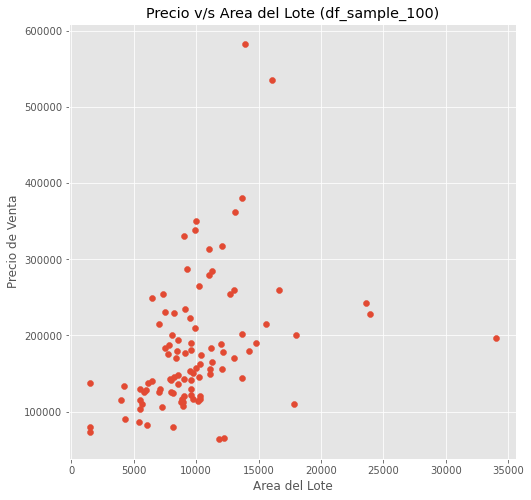

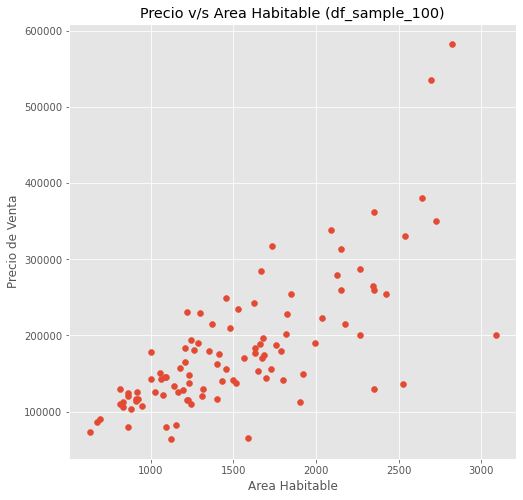

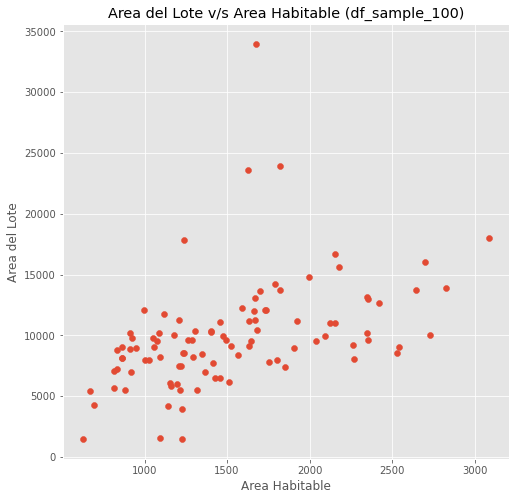

In [14]:
# Haciendo los mismos scatterplots:

# GRAFICO 1: PRECIO VS AREA DEL LOTE

# Crear scatterplot
fig = plt.scatter( df_sample_100['Lot.Area'], df_sample_100['SalePrice'])

# Añadir labels
plt.ylabel('Precio de Venta')
plt.xlabel('Area del Lote')
plt.title('Precio v/s Area del Lote (df_sample_100)')
plt.show()

# GRAFICO 2: PRECIO VS AREA HABITABLE

# Crear scatterplot
fig = plt.scatter( df_sample_100['Gr.Liv.Area'], df_sample_100['SalePrice'])

# Añadir labels
plt.ylabel('Precio de Venta')
plt.xlabel('Area Habitable')
plt.title('Precio v/s Area Habitable (df_sample_100)')
plt.show()

# GRAFICO 3: AREA DEL LOTE VS AREA HABITABLE


# Crear scatterplot
fig = plt.scatter( df_sample_100['Gr.Liv.Area'], df_sample_100['Lot.Area'])

# Añadir labels
plt.ylabel('Area del Lote')
plt.xlabel('Area Habitable')
plt.title('Area del Lote v/s Area Habitable (df_sample_100)')
plt.show()

In [15]:
#  matriz de correlación:

df_sample_100.corr()


,Gr.Liv.Area,SalePrice,Lot.Area,ex_heat
Gr.Liv.Area,1.000000,0.728682,0.444435,0.301064
SalePrice,0.728682,1.000000,0.368406,0.451296
Lot.Area,0.444435,0.368406,1.000000,0.025310
ex_heat,0.301064,0.451296,0.025310,1.000000


In [16]:
# suma de ex_heat en el dataframe df_sample_100

df_sample_100['ex_heat'].sum()

44

## Pregunta 
d) Ahora, crea mil muestras del promedio de un muestreo con n=10 y otro con n=100 de la variable `ex_heat` en una lista llamada `sample_mean_ex_heat_10` y `sample_mean_ex_heat_100`, como en la tarea 2, y mil muestras de la suma de  un muestreo con n=10 y otro con n=100 de la variable `ex_heat` en dos listas llamada `sample_sum_ex_heat_10` y `sample_sum_ex_heat_100`.

In [17]:
## Respuesta

### d)

In [18]:
sample_mean_ex_heat_10 = [df['ex_heat'].sample(10).mean() for i in range(0, 1000)]
sample_mean_ex_heat_100 = [df['ex_heat'].sample(100).mean() for i in range(0, 1000)]


In [19]:
sample_sum_ex_heat_10 = [df['ex_heat'].sample(10).sum() for i in range(0, 1000)]
sample_sum_ex_heat_100 = [df['ex_heat'].sample(100).sum() for i in range(0, 1000)]


## Pregunta
e) Haz un histograma para `sample_mean_ex_heat_100` y otro para `sample_sum_ex_heat_100`.

In [20]:
## Respuesta

### e)

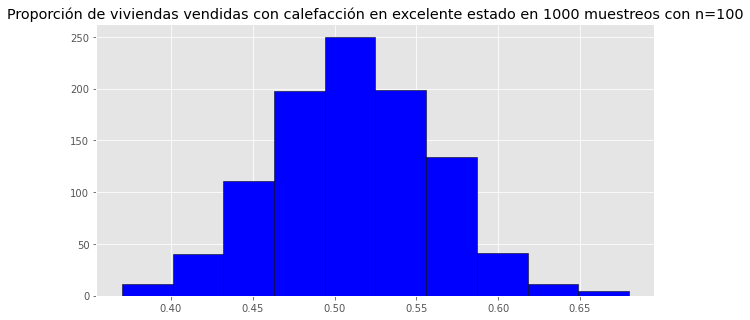

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_mean_ex_heat_100, edgecolor = 'black', color = 'blue')
plt.title("Proporción de viviendas vendidas con calefacción en excelente estado en 1000 muestreos con n=100")
plt.show()

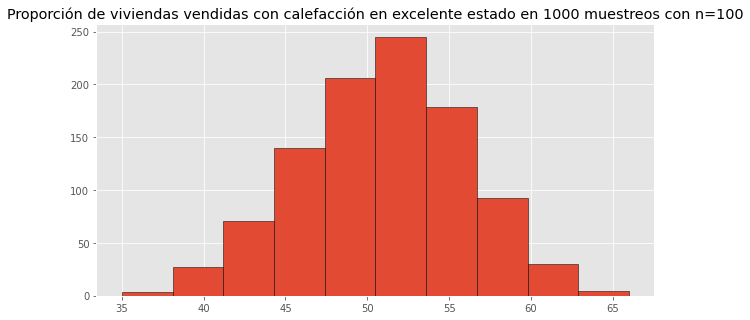

In [22]:
plt.hist(sample_sum_ex_heat_100, edgecolor = 'black')
plt.title("Proporción de viviendas vendidas con calefacción en excelente estado en 1000 muestreos con n=100")
plt.show()


Los histogramas se parecen pero no tienen exactamente la misma forma, porque son dos conjuntos de muestreos distintos. 